# Parameterization with the Open Force Field Toolkit
This notebook shows how to use the API of `offpele` to combine the parameters from OPLS2005 and force fields from the Open Force Field initiative. There are several possible combinations that are displayed below.

## Example 1: Open Force Field parameters with OPLS2005 charges
This example shows how to parameterize a molecule by combining the parameters from the Open Force Field initiative with OPLS2005 partial charges.

### Load the required classes from `offpele`'s API

In [1]:
from offpele.topology import Molecule
from offpele.template import Impact

### `offpele` requires the Schrodinger Toolkit to use the OPLS2005 parameters
To indicate the path to the Schrodinger's installation `offpele` needs the following environment variable to be set.

In [2]:
import os
os.environ['SCHRODINGER'] = '/opt/schrodinger/suites2020-2/'

### Load `offpele`'s molecule representation with a PDB file of anthracene

 - Initializing molecule from a SMILES tag
   - Loading molecule from RDKit
   - Setting molecule name to 'c1ccc2cc3ccccc3cc2c1'
   - Representing molecule with the Open Force Field Toolkit


 - Generating rotamer library
   - Core set to the center of the molecule


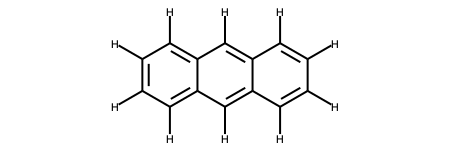

In [3]:
molecule = Molecule(smiles='c1ccc2cc3ccccc3cc2c1')
display(molecule)

### Parameterize with `Open Force Field Toolkit` and `ffld_server`, and generate the Impact template
Please, note that to use OPLS2005 partial charges from OPLS2005 we need to select the `OPLS` option in the `charges_method` parameter when calling the `Molecule.parameterize()` function.
Then, the Impact template, named __antz__, can be generated.

In [4]:
molecule.parameterize('openff_unconstrained-1.2.0.offxml',
                      charge_method='OPLS')
impact = Impact(molecule)
impact.write('antz')

 - Loading forcefield
 - Computing partial charges with OPLS


## Example 2: OPLS2005 parameters with OpenFF torsions
This example shows how to parameterize a molecule by combining the parameters from the `OPLS2005` parameters with `OpenFF` torsions. This combination of parameters allows PELE to use its SGB implicit solvent model (which requires OPLS2005 atom types to be assigned).

### Load the required classes from `offpele`'s API

In [5]:
from offpele.topology import Molecule
from offpele.template import Impact

### `offpele` requires the Schrodinger Toolkit to use the OPLS2005 parameters
To indicate the path to the Schrodinger's installation `offpele` needs the following environment variable to be set.

In [6]:
import os
os.environ['SCHRODINGER'] = '/opt/schrodinger/suites2020-2/'

### Load `offpele`'s molecule representation with a PDB file of aldicarb

 - Initializing molecule from a SMILES tag
   - Loading molecule from RDKit
   - Setting molecule name to 'CC(C)(/C=N\OC(=O)NC)SC'
   - Representing molecule with the Open Force Field Toolkit
 - Generating rotamer library
   - Core set to the center of the molecule


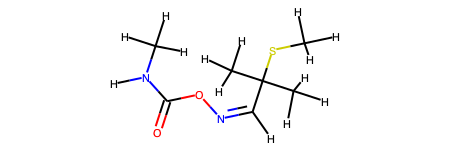

In [7]:
molecule = Molecule(smiles='CC(C)(/C=N\OC(=O)NC)SC')
display(molecule)

### Parameterize with `Open Force Field Toolkit` and `ffld_server`
To work with OPLS2005 non-bonding parameters, we need work with a special force field called `OpenFFOPLS2005ForceField`.

In [8]:
from offpele.forcefield import OpenFFOPLS2005ForceField

hybridff = OpenFFOPLS2005ForceField('openff_unconstrained-1.2.0.offxml')

### Set up the hybrid force field
This force field allows us to combine `OpenFF` and `OPLS2005` parameters through its methods. There are several parameter types that can be combined:
- Non bonding parameters: with `set_nonbonding_parameters()`
- Bond parameters: with `set_bond_parameters()`
- Angle parameters: with `set_angle_parameters()`
- Torsion parameters: with `set_torsion_parameters()`

Please, note that partial charges are assigned by using the `charge_method` parameter from the `Molecule.parameterize()` method.

Below, we are setting up the hybrid force field to parameterize the ligand with the nonbonding, bond and angles terms from the `OPLS2005` force field and assign the torsion parameters with the `OpenFF` force field.

In [9]:
hybridff.set_nonbonding_parameters('OPLS2005')
hybridff.set_bond_parameters('OPLS2005')
hybridff.set_angle_parameters('OPLS2005')
hybridff.set_torsion_parameters('OpenFF')
molecule.set_forcefield(hybridff)

### Generate the Impact template
Finally, the Impact template, named __aldz__, can be generated.

In [10]:
molecule.parameterize(charge_method='OPLS')
impact = Impact(molecule)
impact.write('aldz')

 - Loading forcefield
 - Computing partial charges with OPLS


## Example 3: OpenFF terms with OPLS2005 non-bonding parameters
This example shows how to parameterize a molecule by combining the parameters from the `OpenFF` with non bonding terms from the `OPLS2005`force field. This combination of parameters also allows PELE to use its SGB implicit solvent model (which requires OPLS2005 atom types to be assigned).

### Load the required classes from `offpele`'s API

In [11]:
from offpele.topology import Molecule
from offpele.template import Impact

### `offpele` requires the Schrodinger Toolkit to use the OPLS2005 parameters
To indicate the path to the Schrodinger's installation `offpele` needs the following environment variable to be set.

In [12]:
import os
os.environ['SCHRODINGER'] = '/opt/schrodinger/suites2020-2/'

### Load `offpele`'s molecule representation with a PDB file of diazinon

 - Initializing molecule from a SMILES tag
   - Loading molecule from RDKit
   - Setting molecule name to 'CCOP(=S)(OCC)Oc1cc(nc(n1)C(C)C)C'
   - Representing molecule with the Open Force Field Toolkit
 - Generating rotamer library
   - Core set to the center of the molecule


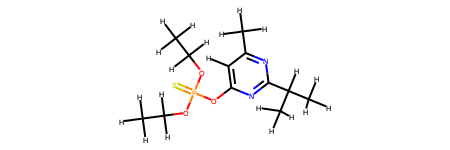

In [13]:
molecule = Molecule(smiles='CCOP(=S)(OCC)Oc1cc(nc(n1)C(C)C)C')
display(molecule)

### Parameterize with `Open Force Field Toolkit` and `ffld_server`
To work with OPLS2005 non-bonding parameters, we need work with a special force field called `OpenFFOPLS2005ForceField`.

In [14]:
from offpele.forcefield import OpenFFOPLS2005ForceField

hybridff = OpenFFOPLS2005ForceField('openff_unconstrained-1.2.0.offxml')

### Set up the hybrid force field
This force field allows us to combine `OpenFF` and `OPLS2005` parameters through its methods. There are several parameter types that can be combined:
- Non bonding parameters: with `set_nonbonding_parameters()`
- Bond parameters: with `set_bond_parameters()`
- Angle parameters: with `set_angle_parameters()`
- Torsion parameters: with `set_torsion_parameters()`

Please, note that partial charges are assigned by using the `charge_method` parameter from the `Molecule.parameterize()` method.

Below, we are setting up the hybrid force field to parameterize the ligand with the nonbonding, bond and angles terms from the `OPLS2005` force field and assign the torsion parameters with the `OpenFF` force field.

In [15]:
hybridff.set_nonbonding_parameters('OPLS2005')
hybridff.set_bond_parameters('OpenFF')
hybridff.set_angle_parameters('OpenFF')
hybridff.set_torsion_parameters('OpenFF')
molecule.set_forcefield(hybridff)

### Generate the Impact template
Finally, the Impact template, named __diaz__, can be generated.

In [16]:
molecule.parameterize(charge_method='OPLS')
impact = Impact(molecule)
impact.write('diaz')

 - Loading forcefield
 - Computing partial charges with OPLS
